<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Credit-Card-Fraud-Detection-via-KNN-and-Naive-Bayes-classifiers" data-toc-modified-id="Credit-Card-Fraud-Detection-via-KNN-and-Naive-Bayes-classifiers-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Credit Card Fraud Detection via KNN and Naive Bayes classifiers</a></span><ul class="toc-item"><li><span><a href="#Loading-Packages" data-toc-modified-id="Loading-Packages-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Loading Packages</a></span></li><li><span><a href="#Importing-Dataset" data-toc-modified-id="Importing-Dataset-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Importing Dataset</a></span><ul class="toc-item"><li><span><a href="#Exploring-Data" data-toc-modified-id="Exploring-Data-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Exploring Data</a></span></li></ul></li><li><span><a href="#Check-for-Missing-Data" data-toc-modified-id="Check-for-Missing-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Check for Missing Data</a></span></li><li><span><a href="#Transactions-in-time" data-toc-modified-id="Transactions-in-time-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Transactions in time</a></span></li><li><span><a href="#Features-correlation" data-toc-modified-id="Features-correlation-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Features correlation</a></span></li><li><span><a href="#Features-density-plot" data-toc-modified-id="Features-density-plot-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Features density plot</a></span></li></ul></li><li><span><a href="#Predective-Modelling" data-toc-modified-id="Predective-Modelling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Predective Modelling</a></span><ul class="toc-item"><li><span><a href="#Function-to-print-the-classifier's-scores" data-toc-modified-id="Function-to-print-the-classifier's-scores-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Function to print the classifier's scores</a></span></li></ul></li><li><span><a href="#K-Nearest-Neighbours-Algorithm" data-toc-modified-id="K-Nearest-Neighbours-Algorithm-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>K Nearest Neighbours Algorithm</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Predict-the-values-for-X_test" data-toc-modified-id="Predict-the-values-for-X_test-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Predict the values for X_test</a></span></li><li><span><a href="#Confusion-matrix" data-toc-modified-id="Confusion-matrix-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Confusion matrix</a></span></li></ul></li><li><span><a href="#Let's-calculate-also-the-Scores." data-toc-modified-id="Let's-calculate-also-the-Scores.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Let's calculate also the Scores.</a></span></li></ul></li><li><span><a href="#Naive-Bayes-Algorithm" data-toc-modified-id="Naive-Bayes-Algorithm-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Naive Bayes Algorithm</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Predict-the-values-for-X_test" data-toc-modified-id="Predict-the-values-for-X_test-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Predict the values for X_test</a></span></li><li><span><a href="#Confusion-matrix" data-toc-modified-id="Confusion-matrix-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Confusion matrix</a></span></li></ul></li><li><span><a href="#Let's-calculate-also-the-Scores." data-toc-modified-id="Let's-calculate-also-the-Scores.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Let's calculate also the Scores.</a></span></li><li><span><a href="#Complexity-comparision-plot-Knn-VS-Naive-Bayes-Algorithms" data-toc-modified-id="Complexity-comparision-plot-Knn-VS-Naive-Bayes-Algorithms-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Complexity comparision plot Knn VS Naive Bayes Algorithms</a></span></li></ul></li></ul></div>

## Credit Card Fraud Detection via KNN and Naive Bayes classifiers

### Loading Packages 

In [26]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


In [27]:
import gc
import time`
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score


### Importing Dataset 

In [29]:
data_df = pd.read_csv("F:/DS/Project/creditcard.csv")

#### Exploring Data

In [30]:
data_df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [31]:
data_df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Looking to the Time feature, we can confirm that the data contains 284,807 transactions, during 2 consecutive days (or 172792 seconds).



### Check for Missing Data

In [32]:
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V15,Amount,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There is no missing data in the entire dataset.



### Transactions in time

In [33]:
class_0 = data_df.loc[data_df['Class'] == 0]["Time"]
class_1 = data_df.loc[data_df['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

In [34]:
tmp = data_df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [35]:
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

The real transaction have a larger mean value, larger Q1, smaller Q3 and Q4 and larger outliers; fraudulent transactions have a smaller Q1 and mean, larger Q4 and smaller outliers.

Let's plot the fraudulent transactions (amount) against time. The time is shown is seconds from the start of the time period (totaly 48h, over 2 days).

In [36]:
fraud = data_df.loc[data_df['Class'] == 1]

trace = go.Scatter(
    x = fraud['Time'],y = fraud['Amount'],
    name="Amount",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='red',
                    width=1),
                opacity=0.5,
            ),
    text= fraud['Amount'],
    mode = "markers"
)
data = [trace]
layout = dict(title = 'Amount of fraudulent transactions',
          xaxis = dict(title = 'Time [s]', showticklabels=True), 
          yaxis = dict(title = 'Amount'),
          hovermode='closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='fraud-amount')

### Features correlation

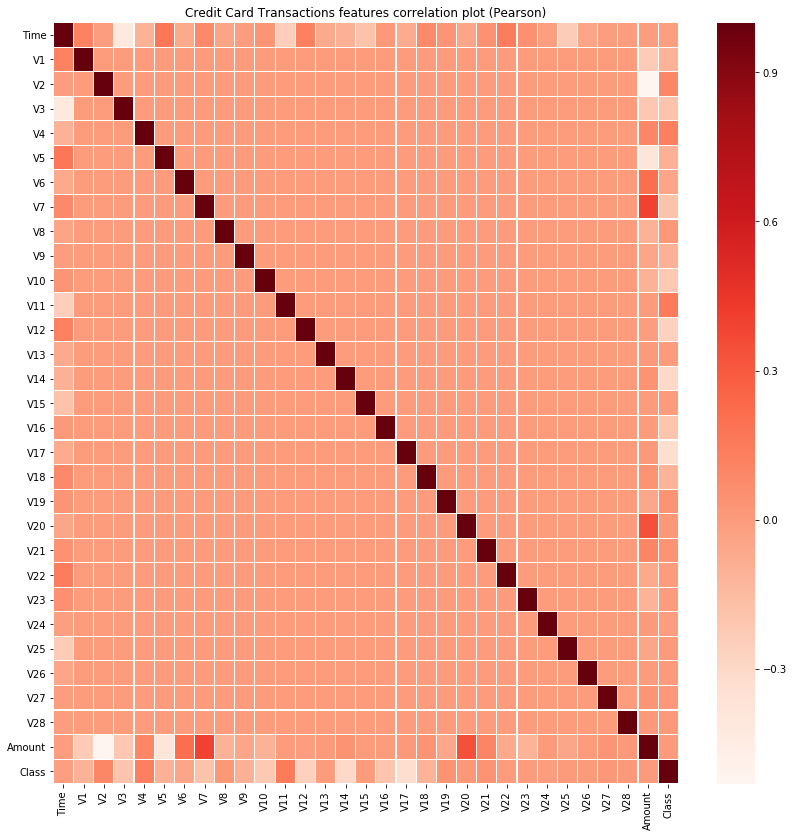

In [37]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

As expected, there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).

Let's plot the correlated and inverse correlated values on the same graph.

Let's start with the direct correlated values: {V20;Amount} and {V7;Amount}

In [38]:
#s = sns.lmplot(x='V20', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
#s = sns.lmplot(x='V7', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
#plt.show()

We can confirm that the two couples of features are correlated (the regression lines for Class = 0 have a positive slope, whilst the regression line for Class = 1 have a smaller positive slope).

Let's plot now the inverse correlated values.



In [39]:
#s = sns.lmplot(x='V2', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
#s = sns.lmplot(x='V5', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
#plt.show()

We can confirm that the two couples of features are inverse correlated (the regression lines for Class = 0 have a negative slope while the regression lines for Class = 1 have a very small negative slope).



### Features density plot


<Figure size 432x288 with 0 Axes>

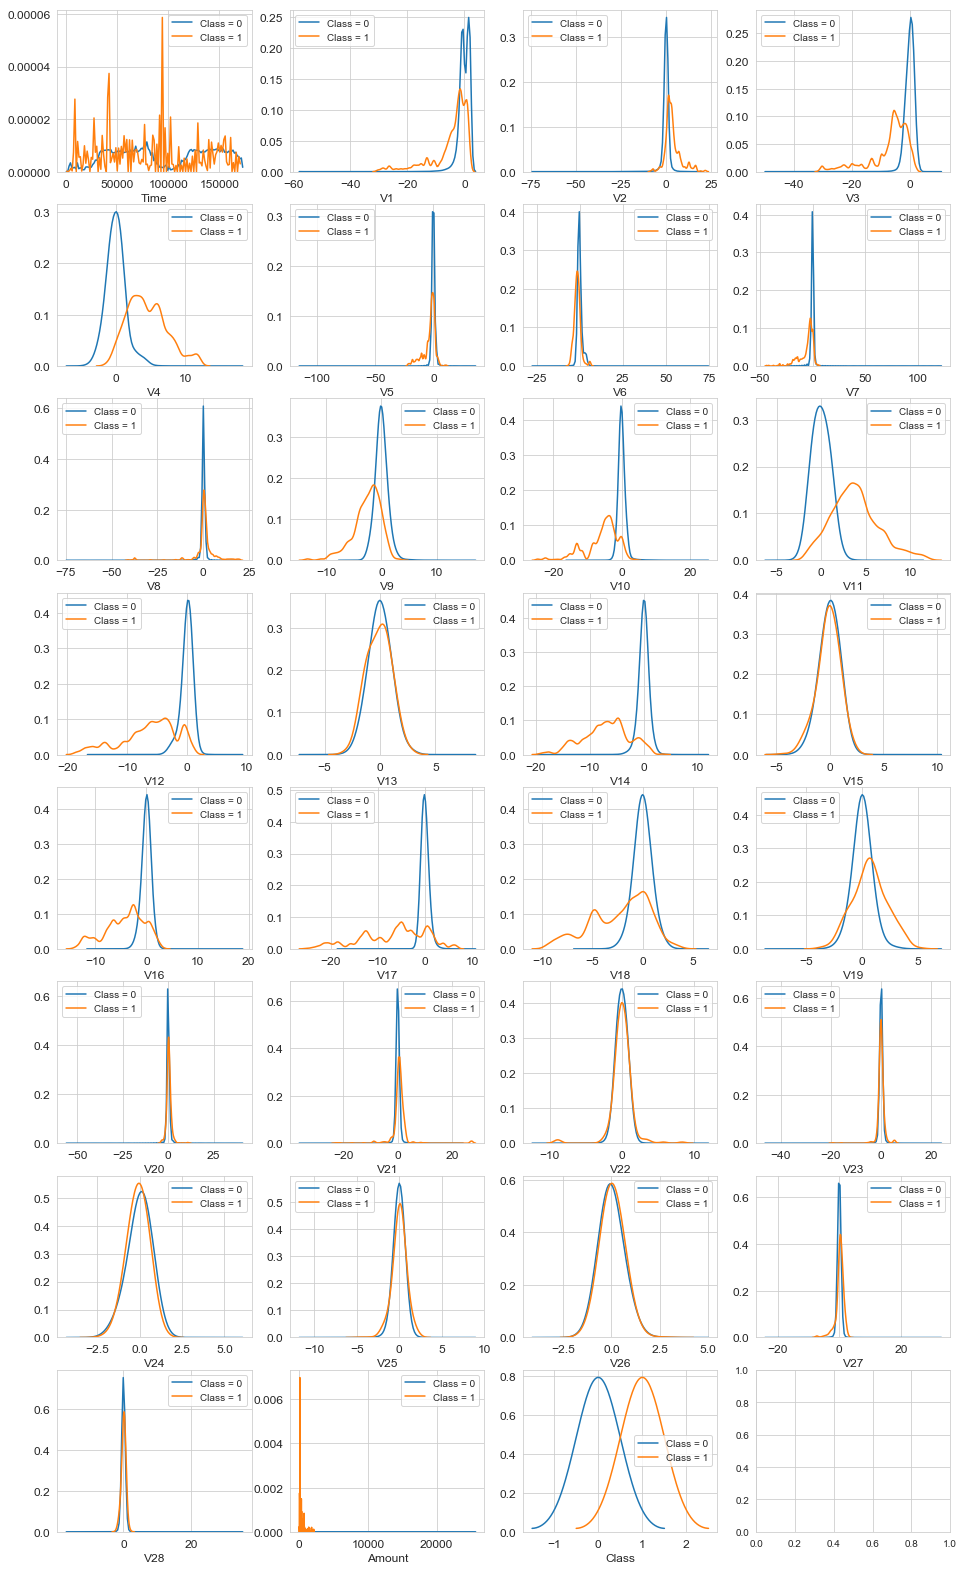

In [40]:
var = data_df.columns.values

i = 0
t0 = data_df.loc[data_df['Class'] == 0]
t1 = data_df.loc[data_df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: V4, V11 have clearly separated distributions for Class values 0 and 1, V12, V14, V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile, whilst V25, V26, V28 have similar profiles for the two values of Class.

In general, with just few exceptions (Time and Amount), the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.

## Predective Modelling

Define predictors and target values
Let's define the predictor features and the target features. Categorical features, if any, are also defined. In our case, there are no categorical feature.

In [114]:
pd.set_option('display.max_columns', 100)
TEST_SIZE = 0.20 # test size using_train_test_split
RANDOM_STATE = 2019

In [65]:
target = data_df['Class']
predictors = data_df.drop(['Class'],axis=1)

Split data in train, test and validation set<br>
Let's define train, validation and test sets.

In [67]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=TEST_SIZE, 
                                                    random_state=RANDOM_STATE, shuffle=True)

### Function to print the classifier's scores

In [43]:
def print_scores(y_test,y_pred):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    #print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC score: ", roc_auc_score(y_test, y_pred))

## K Nearest Neighbours Algorithm 

In [44]:
#from Knn_classifier import KNeighborsClassifier

In [86]:
from sklearn.neighbors import KNeighborsClassifier


In [102]:
plotlist = []
for i in range(1,31):
    
    start = time.clock() 
    knn = KNeighborsClassifier()
    knn.fit(X_train.iloc[:,:i], y_train)
    end = time.clock()     
    print("Time required to fit "+ str(i) +" Demension Model is " + str(end-start) + " seconds")
    
    plotlist.append(end-start)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning:

time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning:

time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead



Time required to fit 1 Demension Model is 0.3905216429993743 seconds
Time required to fit 2 Demension Model is 0.40738060000148835 seconds
Time required to fit 3 Demension Model is 0.5127850700009731 seconds
Time required to fit 4 Demension Model is 0.5883995190015412 seconds
Time required to fit 5 Demension Model is 0.5633141350044752 seconds
Time required to fit 6 Demension Model is 0.62388475699845 seconds
Time required to fit 7 Demension Model is 0.67253546500433 seconds
Time required to fit 8 Demension Model is 0.7140464580006665 seconds
Time required to fit 9 Demension Model is 0.769224639996537 seconds
Time required to fit 10 Demension Model is 0.8016481640006532 seconds
Time required to fit 11 Demension Model is 0.845559282002796 seconds
Time required to fit 12 Demension Model is 0.8746296229946893 seconds
Time required to fit 13 Demension Model is 0.9003010300002643 seconds
Time required to fit 14 Demension Model is 0.9284378480006126 seconds
Time required to fit 15 Demension 

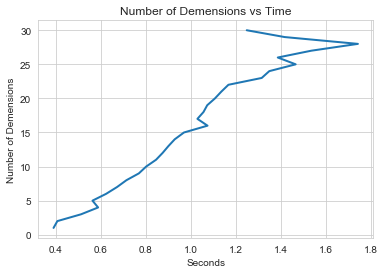

In [103]:
plt.xlabel('Seconds') 
plt.ylabel('Number of Demensions') 
plt.title('Number of Demensions vs Time') 
plt.plot(plotlist, range(1,31), linewidth=2.0)


#### Predict the values for X_test
Let's now predict the target values for the val_df data, using predict function.

In [47]:
preds = knn.predict(X_test)


#### Confusion matrix
Let's visualize the confusion matrix.

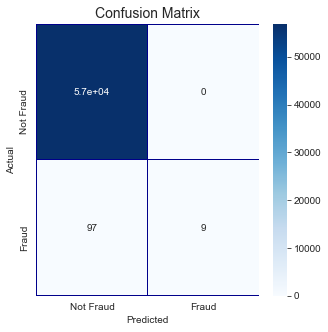

In [48]:
cm = pd.crosstab(y_test, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()


### Let's calculate also the Scores.

In [49]:
print_scores(y_test,preds)


test-set confusion matrix:
 [[56856     0]
 [   97     9]]
recall score:  0.08490566037735849
precision score:  1.0
f1 score:  0.15652173913043477
ROC AUC score:  0.5424528301886793


## Naive Bayes Algorithm  

In [50]:
from sklearn.naive_bayes import GaussianNB


In [109]:
naivebayesplot = []
for i in range(1,31):
    
    start = time.clock() 
    model = GaussianNB()
    model.fit(X_train.iloc[:,:i], y_train);
    end = time.clock() 
    
    print("Time required to fit "+ str(i) +" Demension Model is " + str(end-start) + " seconds")
    
    naivebayesplot.append(end-start)




C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning:

time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning:

time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead



Time required to fit 1 Demension Model is 0.021788234000268858 seconds
Time required to fit 2 Demension Model is 0.03531714099517558 seconds
Time required to fit 3 Demension Model is 0.03482621799776098 seconds
Time required to fit 4 Demension Model is 0.03569548599625705 seconds
Time required to fit 5 Demension Model is 0.042537562003417406 seconds
Time required to fit 6 Demension Model is 0.05027820699615404 seconds
Time required to fit 7 Demension Model is 0.052917366003384814 seconds
Time required to fit 8 Demension Model is 0.06581604199891444 seconds
Time required to fit 9 Demension Model is 0.0625111810004455 seconds
Time required to fit 10 Demension Model is 0.07221140400361037 seconds
Time required to fit 11 Demension Model is 0.07069288499769755 seconds
Time required to fit 12 Demension Model is 0.07501917499757838 seconds
Time required to fit 13 Demension Model is 0.08807874900230672 seconds
Time required to fit 14 Demension Model is 0.09245027600263711 seconds
Time required

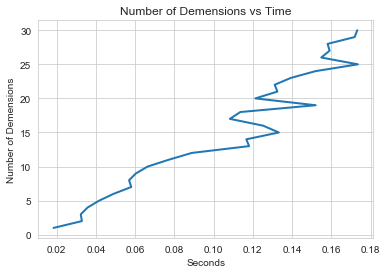

In [105]:
plt.xlabel('Seconds') 
plt.ylabel('Number of Demensions') 
plt.title('Number of Demensions vs Time') 
plt.plot(naivebayesplot, range(1,31), linewidth=2.0)

#### Predict the values for X_test
Let's now predict the target values for the val_df data, using predict function.

In [110]:
model.predict = model.predict(X_test)


#### Confusion matrix
Let's visualize the confusion matrix.

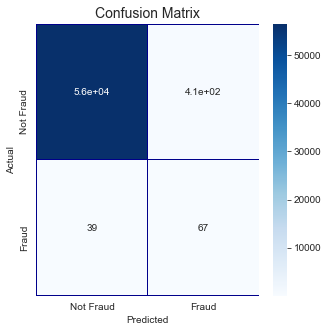

In [111]:
cm = pd.crosstab(y_test, model.predict , rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [112]:
print("ROC AUC score: ", roc_auc_score(y_test, model.predict))

ROC AUC score:  0.8123969591500275


### Let's calculate also the Scores.

In [113]:
print_scores(y_test,model.predict)


test-set confusion matrix:
 [[56442   414]
 [   39    67]]
recall score:  0.6320754716981132
precision score:  0.1392931392931393
f1 score:  0.22827938671209538
ROC AUC score:  0.8123969591500275


### Complexity comparision plot Knn VS Naive Bayes Algorithms

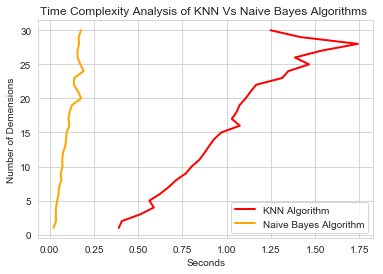

In [117]:
plt.plot(plotlist, range(1,31), marker='', color='red', linewidth=2, label="KNN Algorithm")
plt.plot( naivebayesplot, range(1,31), marker='', color='orange', linewidth=2, label="Naive Bayes Algorithm")
plt.xlabel('Seconds') 
plt.ylabel('Number of Demensions') 
plt.title('Time Complexity Analysis of KNN Vs Naive Bayes Algorithms ') 
plt.legend()


